# Visualizations

### Plot smoothed data (validation accuracy over steps)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
acc_depth = pd.read_csv('output/lightning_logs_SplitOnTime_noProc_noSubEmb_b2b_reconn.csv')
acc_sub = pd.read_csv('output/lightning_logs_SplitOnTime_noProc_noSubEmb_b2b_reconn-sub.csv')
acc_nob2b = pd.read_csv('output/lightning_logs_version_8.csv')
# b2b = pd.read_csv('output/lightning_logs_version_2.csv')

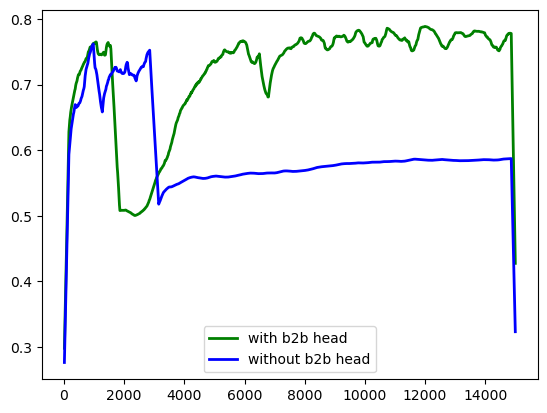

In [15]:
 # Smooth the data
x = acc_depth['Step']
y = acc_depth['Value']

x_ = acc_nob2b['Step']
y_ = acc_nob2b['Value']

 
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# plt.plot(x, y)
plt.plot(x, smooth(y,20), 'g-', lw=2)
plt.plot(x_, smooth(y_,20), 'b-', lw=2)
plt.legend(['with b2b head', 'without b2b head'])
plt.show()